In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [3]:
print(X,y)

[[-5.37039106  3.47555168]
 [ 5.84161203 -3.98182959]
 [ 1.76127766  9.39696306]
 ...
 [ 6.14147823 -5.75491603]
 [-5.45330839  1.75599573]
 [-0.21966953  8.72922042]] [2 1 0 2 1 0 2 1 2 0 0 0 2 0 1 2 2 2 1 1 0 1 2 2 0 0 1 2 0 0 0 2 1 2 1 0 1
 2 2 1 0 1 1 2 2 1 0 2 1 1 2 2 1 2 0 2 0 2 2 2 1 0 2 2 2 2 2 2 0 2 2 0 0 1
 1 2 0 0 1 1 0 2 1 2 2 0 1 2 1 2 0 1 0 0 2 0 2 1 2 2 0 2 1 2 2 2 2 0 1 1 0
 2 2 2 2 2 2 1 2 0 0 0 1 1 1 1 0 0 2 0 2 1 0 0 2 1 1 2 1 2 1 0 0 1 1 0 1 0
 0 0 0 2 0 0 1 1 1 1 2 1 2 1 0 2 0 1 1 0 1 1 1 0 1 1 0 2 0 0 2 1 1 2 0 1 2
 1 0 1 1 1 1 1 1 2 2 1 2 0 2 2 2 0 1 1 0 0 1 0 2 0 0 1 0 2 0 1 1 0 0 1 1 2
 0 2 0 1 2 2 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 2 1 2 1 0 2 0 0 2 2 0 1 0 1
 1 2 1 0 0 1 0 0 0 1 2 0 2 0 1 0 1 2 2 2 0 1 0 1 2 2 0 0 0 0 0 0 2 1 1 2 0
 2 2 1 1 1 2 2 0 1 1 0 0 2 0 0 1 2 1 0 1 2 0 1 0 1 1 0 2 2 1 2 0 0 0 1 0 2
 0 0 1 0 0 2 0 1 1 2 0 0 2 1 2 0 0 2 2 2 1 0 1 1 1 0 0 2 0 2 2 0 2 0 1 1 2
 1 1 2 0 2 2 0 1 0 1 1 2 2 1 0 0 2 0 2 1 2 2 2 0 0 2 1 1 1 1 0 0 0 2 0 0 2
 1 1 0 

In [4]:
print(X.shape, y.shape)

(1000, 2) (1000,)


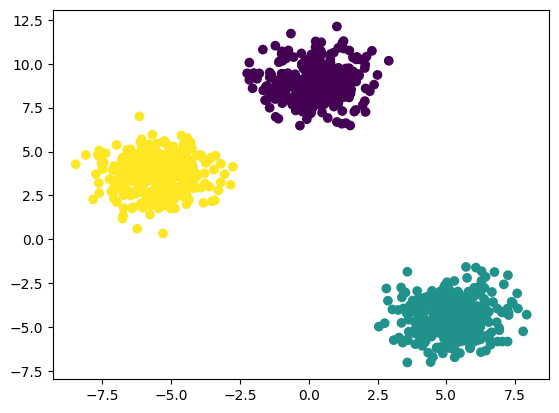

In [6]:
plt.scatter(X[:,0], X[:,1],c=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Manual method of finding k means (Elbow method to select the k value)

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [11]:
print(wcss)

[34827.57682552022, 7935.4372861454185, 1319.2730531585607, 1140.467788465513, 1002.149751067589, 901.1468278895115, 769.4412632526444, 685.5034799038174, 630.5139400034295, 563.3202882033493]


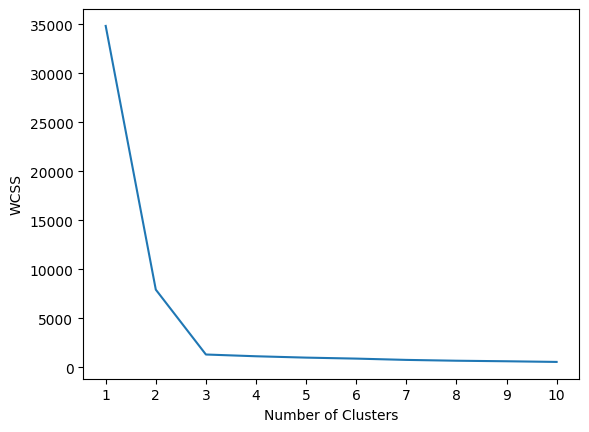

In [12]:
#ploting elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans = KMeans(n_clusters =3, init = "k-means++")

In [18]:
y_labels = kmeans.predict(X_train)

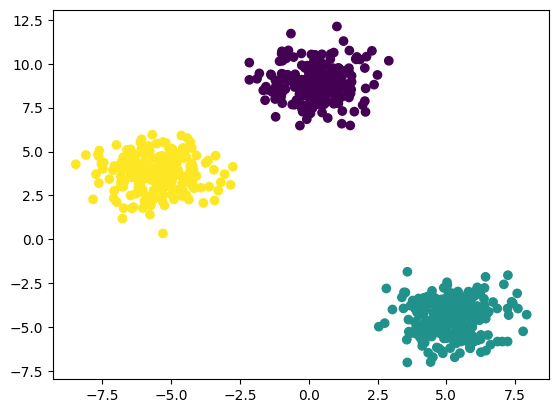

In [19]:
plt.scatter(X_train[:,0], X_train[:,1],c = y_labels)

In [23]:
y_test_labels = kmeans.fit_predict(X_test)

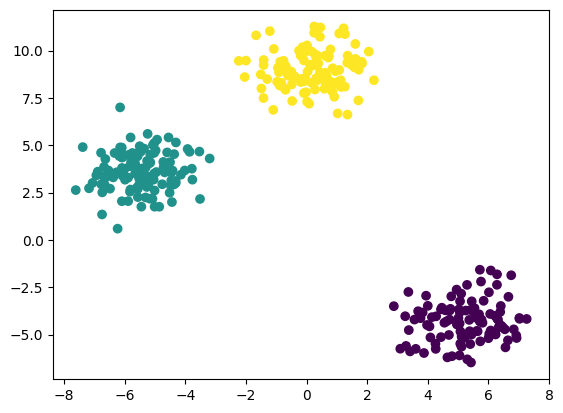

In [24]:
plt.scatter(X_test[:,0], X_test[:,1],c = y_test_labels)

In [30]:
from kneed import KneeLocator
kl= KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [31]:
#preformance matrix using silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6589045817582294,
 0.6557491718803581,
 0.4952175532791904,
 0.474074490747399,
 0.33330736268309524,
 0.33990962409563075,
 0.33701387667330474]

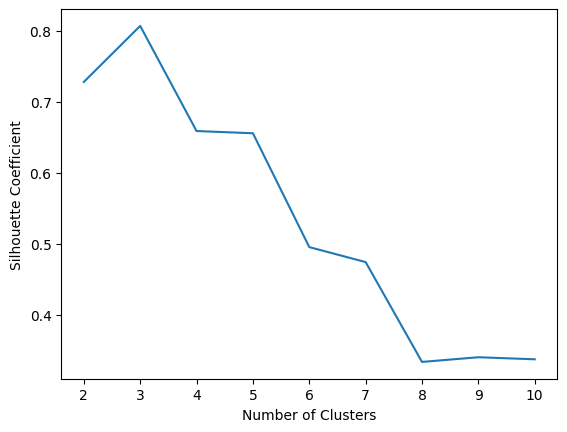

In [34]:
#ploting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()